In [2]:
from keras.models import load_model
from keras.callbacks import History 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('HOUST.csv')
# split data into training and testing sets
training_set = df.iloc[:, 1:2].values

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
regressor = load_model('House_Predictor_best_model_v1.h5')

In [6]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 50, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [7]:
dataset_total = df.iloc[:, 1:2].values

In [8]:
timestemp = 50
prediction_month = 36

In [9]:
result = []
for i in range(0, prediction_month):
    X_test = []
    inputs = dataset_total[len(dataset_total) - timestemp:]
    inputs = inputs.reshape(-1,1)
    inputs = sc.transform(inputs)
    X_test.append(inputs[0:timestemp, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    predicted = regressor.predict(X_test)
    predicted = sc.inverse_transform(predicted)
    result.append(predicted[0][0])
    dataset_total = np.append(dataset_total, predicted[0][0])
    

In [10]:
print(result)

[1388.9258, 1387.5399, 1379.8264, 1367.316, 1349.3477, 1326.2349, 1299.1796, 1270.1917, 1241.7942, 1216.4415, 1195.8712, 1181.002, 1171.5878, 1166.6355, 1164.6165, 1164.0826, 1163.7622, 1162.7972, 1160.7073, 1157.2161, 1152.4532, 1146.764, 1140.8541, 1135.1958, 1130.2355, 1126.2843, 1123.4127, 1121.626, 1120.7881, 1120.508, 1120.6412, 1120.8832, 1121.0653, 1121.1161, 1120.9886, 1120.711]


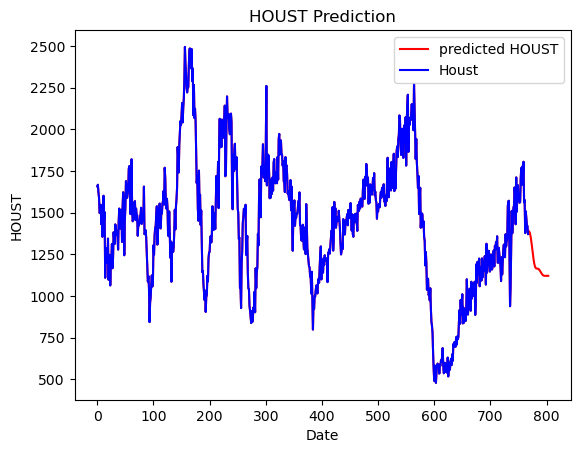

In [11]:
plt.plot(dataset_total, color = 'red', label = 'predicted HOUST')
plt.plot(training_set, color = 'blue', label = 'Houst')
plt.title('HOUST Prediction')
plt.xlabel('Date')
plt.ylabel('HOUST')
plt.legend()
plt.show()

In [12]:
result = pd.DataFrame({'HOUST': result})
result.to_csv('result_HOUST_new.csv', index=False)